In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Making presto style plot

In [3]:
df_presto2 = pd.read_csv('/home/ak/research/emmanuel/proj_algorithm/sim_pulse_02.txt', sep = '    ')
df_presto2.head(1)

,time_sec,intensity
0,0.0,4.737395


<font color = 'purple'>If I understood things correctly, we used optimal frequency to find the time period of a pulse. And, integer number we get when that time period is divided by the time resolution of the data gives us what chunk size to take along the X(phase) axis. This is one stack. To get the number of bins(stack), we divide total number of datapoints by the chunk size and take integer number of the quotient.  We cutoff the rest of the intensity data points at the end.  Then we stack all these bins on top of each other serially to get the presto plot. </font>

In [4]:
freq_true = 228.8373                                                     # Data informed value of frequency 
time_period = 1/freq_true                                                # Timeperiod of a single pulse cycle
delta_time = df_presto2['time_sec'][1] - df_presto2['time_sec'][0]       # Time resolution of timeseries data
bin_size = int(time_period/delta_time)                                   # Chunk size of timeseries to take as one bin
total_num_datapoints = len(df_presto2['intensity'])                      # Total number of timestamps/datapoints
num_of_bins = int(total_num_datapoints/(bin_size))                       # Integer number of bins to take out of total datapoints
intensity_cutoff = df_presto2['intensity'][0:bin_size*num_of_bins]       # Intensity data points to consider excluding the cutoff
data_timelenght = max(df_presto2['time_sec'])
print('Bin Size -', bin_size, '\nNumber of bins -', num_of_bins)

Bin Size - 218 
Number of bins - 223


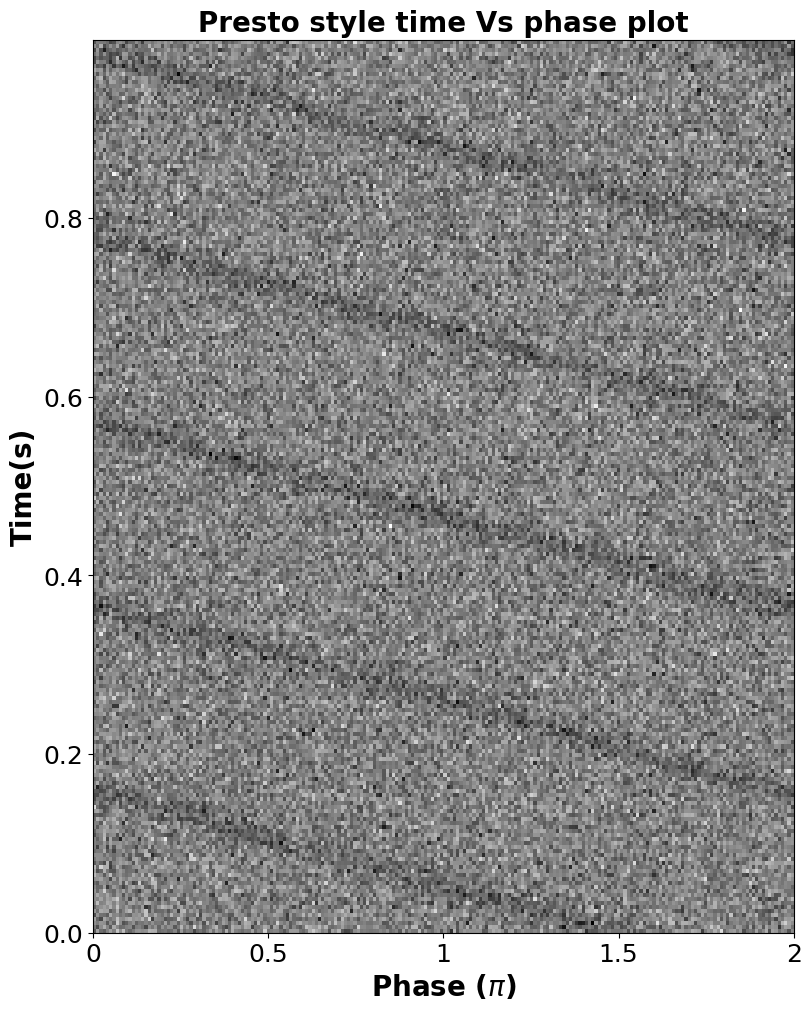

In [5]:
fig, prestoplot2 = plt.subplots(figsize=(8, 10), layout='constrained')
X_phase = np.linspace(0, 2*np.pi, bin_size + 1)
Y_time = np.linspace(0, data_timelenght, num_of_bins + 1) 
Z_intensity = np.array(intensity_cutoff).reshape(num_of_bins, bin_size)
# X = np.linspace(self.low_limit_freq, self.up_limit_freq, self.N_w + 1)
# Y = np.linspace(0, 2 * np.pi, self.N_phi + 1)
# Z = np.array(df_presto['intensity']).reshape(self.N_phi, self.N_w)
pcm = prestoplot2.pcolormesh(X_phase, Y_time, Z_intensity, cmap=plt.cm.gray_r, vmin=Z_intensity.min(), vmax=Z_intensity.max())
prestoplot2.set_xlabel('Phase ($\pi$)', fontweight='bold', fontsize=20)
prestoplot2.set_ylabel('Time(s)', fontweight='bold', fontsize=20)
prestoplot2.yaxis.set_tick_params(labelsize=18)
prestoplot2.xaxis.set_tick_params(labelsize=18)
prestoplot2.set_xticks([0, 1.570, 3.141, 4.712, 6.283], [0,0.5,1,1.5,2], minor = False)
prestoplot2.set_title('Presto style time Vs phase plot', fontweight='bold', fontsize=20)
# plt.savefig('/home/ak/Desktop/trialsize214.pdf')  # Only if you want to save your figure.
plt.show()

## <font color = 'red'>Does not look great! </font>